# **Precision Measurements of CKM Matrix elements (Flavor Physics)**
This work is a continuation of the REYES 2023 Hadronic Physics Project. In the previous study, we extracted the values of $|V_{ub}|$ and the parameter $\alpha$. In the present work, we aim to determine the uncertainties associated with $|V_{ub}|$ and $ \alpha$ for a more precise measurement. Additionally, we extract the value of the form factor normalization $ f_{+}(0)$, along with its corresponding uncertainty.

In [1]:
################################################################################
#                              IMPORTING LIBRARIES                             #
################################################################################
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad


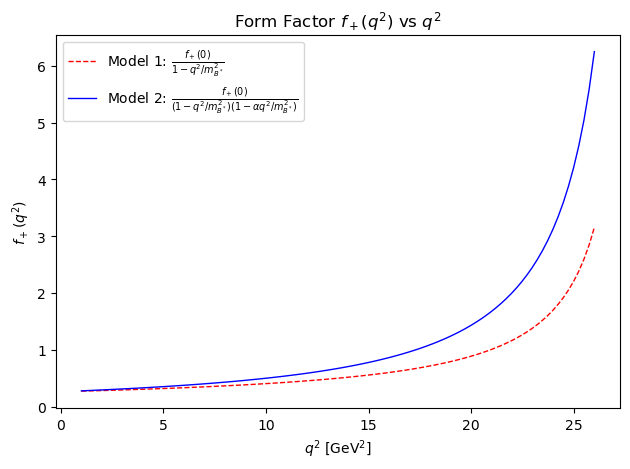

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
f_plus0 = 0.261
mb_star = 5.324
alpha = 0.54

# Model 1: Single pole
def f1_plus(q2):
    return f_plus0 / (1 - (q2 / mb_star**2))

# Model 2: Modified pole (with α)
def f2_plus(q2):
    return f_plus0 / ((1 - q2 / mb_star**2) * (1 - ((alpha * q2) / mb_star**2)))

# q² range
q2 = np.linspace(1, 26, 100)

# Plotting both models
plt.plot(q2, f1_plus(q2), '--r', label='Model 1: $\\frac{f_+(0)}{1 - q^2/m_{B^*}^2}$', linewidth=1)
plt.plot(q2, f2_plus(q2), '-b', label='Model 2: $\\frac{f_+(0)}{(1 - q^2/m_{B^*}^2)(1 - \\alpha q^2/m_{B^*}^2)}$', linewidth=1)

# Axes and title
plt.xlabel('$q^2$ [GeV$^2$]')
plt.ylabel('$f_+(q^2)$')
plt.title('Form Factor $f_+(q^2)$ vs $q^2$')
plt.legend()
plt.tight_layout()
plt.show()


In [3]:
#Defining the constants

br=1.50e-4
gamma_B0= 4.33e-13
GF= 1.166e-5
mb_Gev= 5.27966
mpi_Gev= 0.13957
ml_Mev= 0.511

def lambda_xyz(x, y, z):
    return x**2 + y**2 + z**2 - 2*(x*y + x*z + y*z)

In [4]:
#Performing integration

def integrand1(q_2):
    term1= (GF**2 *np.sqrt(lambda_xyz(mb_Gev**2, mpi_Gev**2, q_2))) / (128*mb_Gev**3 *np.pi**3 *q_2)
    term2= (1-(ml_Mev * 10**(-3))**2 / q_2)**2
    term3= (2*q_2/3) * lambda_xyz(mb_Gev**2, mpi_Gev**2, q_2) * (1+((ml_Mev*10**(-3))**2/(2*q_2)))*np.abs(f1_plus(q_2))**2
    return term1* term2* term3

def integrand2(q_2):
    term1= (GF**2 *np.sqrt(lambda_xyz(mb_Gev**2, mpi_Gev**2, q_2))) / (128*mb_Gev**3 *np.pi**3 *q_2)
    term2= (1-(ml_Mev * 10**(-3))**2 / q_2)**2
    term3= (2*q_2/3) * lambda_xyz(mb_Gev**2, mpi_Gev**2, q_2) * (1+((ml_Mev*10**(-3))**2/(2*q_2)))*np.abs(f2_plus(q_2))**2
    return term1* term2* term3

# Integration limits
lower_lim = 0
upper_lim = (mb_Gev - mpi_Gev)**2

# Integral Terms
result1, error1 = quad(integrand1, lower_lim, upper_lim)
result2, error2 = quad(integrand2, lower_lim, upper_lim)

# V_ub
v_ub1 = np.sqrt(br * gamma_B0 / result1)
print("Model 1:", v_ub1)
v_ub2 = np.sqrt(br * gamma_B0 / result2)
print("Model 2:", v_ub2)

Model 1: 0.004621850869111274
Model 2: 0.003708115656038955


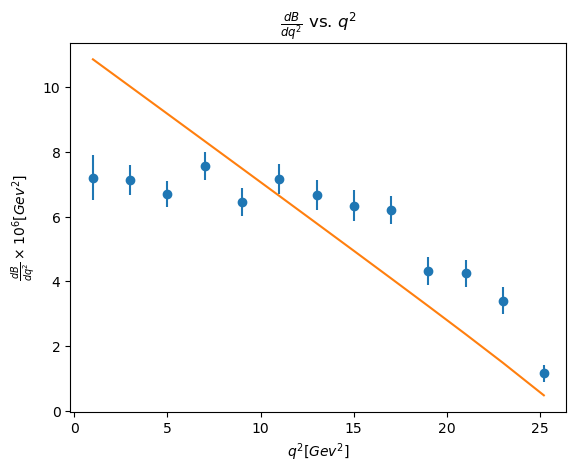

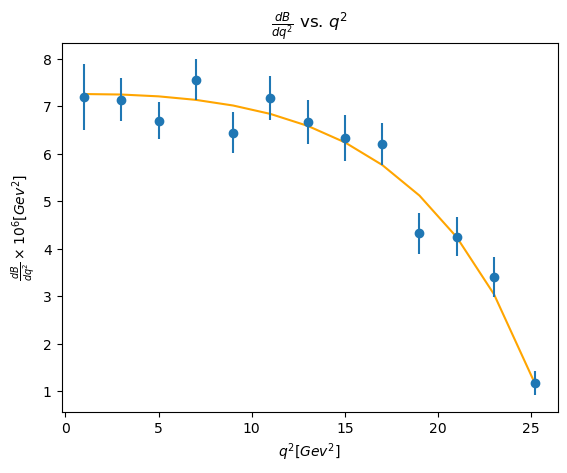

In [5]:
"Plotting for Model 1"
pts = [1,3,5,7,9,11,13,15,17,19,21,23,25.2]

def dB_dq_2_1(pts):
    # Initialize empty array to store the result
    result = np.zeros_like(pts)

    # Loop through each q_2 value and calculate dB/dq_2
    for i, q in enumerate(pts):
        term1 = (GF**2 *np.abs(v_ub1)**2* np.sqrt(lambda_xyz(mb_Gev**2, mpi_Gev**2, q))) / (128*gamma_B0 * mb_Gev**3 * np.pi**3 * q)
        term2 = (1 - (ml_Mev * 10**(-3))**2 / q)**2
        term3 = (2 * q / 3) * lambda_xyz(mb_Gev**2, mpi_Gev**2, q) * (1 + ((ml_Mev * 10**(-3))**2 / (2 * q)))**2 * np.abs(f1_plus(q))**2
        result[i] = term1 * term2 * term3
    return result

# Calculate dB/dq_2 values
dB_dq_2_value_1 = dB_dq_2_1(pts)
#print(dB_dq_2_value_1)
dB_dq_2_values_1_1= dB_dq_2_value_1*1e6

pts = [1,3,5,7,9,11,13,15,17,19,21,23,25.2]
B_data = [7.2,7.140000000000001,6.7,7.56,6.44000000000001,7.170000000000001,6.670000000000001,6.33,6.2,4.32,4.25,3.4000000000000004,1.17]   # data values of distribution
sigma = np.array([0.7000000000000001,0.45999999999999996, 0.39, 0.43, 0.43, 0.45999999999999996, 0.47000000000000003, 0.48, 0.44000000000000006, 0.43, 0.41, 0.42000000000000004, 0.26])  #sigma vlues
plt.errorbar(pts,B_data,yerr = sigma,fmt='o')
plt.plot(pts, dB_dq_2_values_1_1)
plt.xlabel('$q^2[Gev^2]$')
plt.ylabel(r'$\frac{{dB}}{{dq^2}} \times 10^6[Gev^2]$')
plt.title(r'$\frac{{dB}}{{dq^2}}$ vs. $q^2$')
plt.show()

"Plotting for Model 2"

def dB_dq_2(pts):
    # Initialize empty array to store the result
    result = np.zeros_like(pts)

    # Loop through each q_2 value and calculate dB/dq_2
    for i, q in enumerate(pts):
        term1 = (GF**2 *np.abs(v_ub2)**2* np.sqrt(lambda_xyz(mb_Gev**2, mpi_Gev**2, q))) / (128*gamma_B0 * mb_Gev**3 * np.pi**3 * q)
        term2 = (1 - (ml_Mev * 10**(-3))**2 / q)**2
        term3 = (2 * q / 3) * lambda_xyz(mb_Gev**2, mpi_Gev**2, q) * (1 + ((ml_Mev * 10**(-3))**2 / (2 * q)))**2 * np.abs(f2_plus(q))**2
        result[i] = term1 * term2 * term3

    return result

    # Calculate dB/dq_2 values
dB_dq_2_values = dB_dq_2(pts)
#print(dB_dq_2_values)
dB_dq_2_values_1= dB_dq_2_values*1e6

plt.plot(pts, dB_dq_2_values_1, color='orange')
plt.errorbar(pts,B_data,yerr = sigma,fmt='o')
plt.xlabel('$q^2[Gev^2]$')
plt.ylabel(r'$\frac{{dB}}{{dq^2}} \times 10^6[Gev^2]$')
plt.title(r'$\frac{{dB}}{{dq^2}}$ vs. $q^2$')
plt.show()

In [6]:
# Provided data points
data_text = """{1, 7.2, 0.7000000000000001}
{3, 7.140000000000001, 0.45999999999999996}
{5, 6.7, 0.39}
{7, 7.56, 0.43}
{9, 6.440000000000001, 0.43}
{11, 7.170000000000001, 0.45999999999999996}
{13, 6.670000000000001, 0.47000000000000003}
{15, 6.33, 0.48}
{17, 6.2, 0.44000000000000006}
{19, 4.32, 0.43}
{21, 4.25, 0.41}
{23, 3.4000000000000004, 0.42000000000000004}
{25.2, 1.17, 0.26}"""

# Split the data into lines
lines = data_text.split("\n")

# Clean each line by removing the curly braces
cleaned_data = [line.replace("{", "").replace("}", "") for line in lines]

# Convert the data to float arrays
q_2_values = np.array([float(line.split(",")[0]) for line in cleaned_data])
db_dq_2_values = np.array([float(line.split(",")[1]) for line in cleaned_data])
err = np.array([float(line.split(",")[2]) for line in cleaned_data])
print(q_2_values)

[ 1.   3.   5.   7.   9.  11.  13.  15.  17.  19.  21.  23.  25.2]


In [7]:
"Defining the constants"
f_plus0 = 0.261
mb_star = 5.324
gamma_B0 = 4.33e-13
GF = 1.166e-5
mb_Gev = 5.27966
mpi_Gev = 0.13957
ml_Mev = 0.511

def lambda_xyz(x, y, z):
    return x**2 + y**2 + z**2 - 2*(x*y + x*z + y*z)

Performing Chi-Square Test to extract the optimal value of Vub and alpha.

In [8]:
def f_plus2(q_2):
    f_plus = f_plus0 / ((1 - q_2 / mb_star**2) * (1 - alpha * q_2 / mb_star**2))
    return f_plus

def dB_dq_2(q_2_values, alpha, v_ub):
    result = np.zeros_like(q_2_values)
    for i, q in enumerate(q_2_values):
        term1 = (GF**2 * np.abs(v_ub)**2 * np.sqrt(lambda_xyz(mb_Gev**2, mpi_Gev**2, q))) / (128 * gamma_B0 * mb_Gev**3 * np.pi**3 * q)
        term2 = (1 - (ml_Mev * 10**(-3))**2 / q)**2
        term3 = (2 * q / 3) * lambda_xyz(mb_Gev**2, mpi_Gev**2, q) * (1 + ((ml_Mev * 10**(-3))**2 / (2 * q))) * np.abs(f_plus2(q))**2
        result[i] = term1 * term2 * term3
    return result*10**6

"Performing Chi-Square Fitting"

# Grid search over alpha and v_ub
x = np.linspace(0, 1, 40)
y = np.linspace(0.001, 0.005, 40)
chi_square_values = np.zeros((40, 40))

for alpha_index, alpha in enumerate(x):
    for v_ub_index, v_ub in enumerate(y):
        # Calculate dB/dq_2 values for current alpha and v_ub
        dB_dq_2_values_model = dB_dq_2(q_2_values, alpha, v_ub)

        # Calculate chi-square for the current model and ignore the third data point
        chi_square = np.sum(((db_dq_2_values[:13]-dB_dq_2_values_model[:13])/err[:13])**2)

        # Store the chi-square value in the 2D array
        chi_square_values[alpha_index, v_ub_index] = chi_square

# Find the minimum chi-square value and its corresponding indices
min_chi_square = np.min(chi_square_values)
optimal_alpha_index, optimal_v_ub_index = np.unravel_index(np.argmin(chi_square_values), chi_square_values.shape)

# Get the corresponding optimal_alpha and optimal_v_ub using the index
optimal_alpha = x[optimal_alpha_index]
optimal_v_ub = y[optimal_v_ub_index]

# Print the results
print("\n Minimum Value of χ² is:", min_chi_square)
print("Optimal Vub value corresponding to minimum chi-square:", optimal_v_ub)
print("Optimal alpha value corresponding to minimum chi-square:", optimal_alpha)
dof = 11 #calculated using no of data points-parameters
goodness_of_fit= min_chi_square/dof
print("Goodness of fit:",goodness_of_fit)
#print(dB_dq_2(q_2_values, alpha, v_ub))


 Minimum Value of χ² is: 10.392744316527008
Optimal Vub value corresponding to minimum chi-square: 0.003666666666666667
Optimal alpha value corresponding to minimum chi-square: 0.5641025641025641
Goodness of fit: 0.9447949378660916


In the earlier analysis, the data points were assumed to be statistically independent. We now incorporate the correlations among the data points, which is essential for a more robust and realistic treatment of the uncertainties.

Extracting the uncertainties associated with Vub and alpha using covariance matrix

In [9]:
# Performing curve fitting to find the covariance matrix
import scipy.optimize as opt

# Defining the constants
f_plus0 = 0.261
mb_star = 5.324
gamma_B0 = 4.33e-13
GF = 1.166e-5
mb_Gev = 5.27966
mpi_Gev = 0.13957
ml_Mev = 0.511

# Define the lambda_xyz function
def lambda_xyz(x, y, z):
    return x**2 + y**2 + z**2 - 2*(x*y + x*z + y*z)

# Define the f_plus2 function
def f_plus2(X, alpha):
    f_plus = f_plus0 / ((1 - X / mb_star**2) * (1 - alpha * X / mb_star**2))
    return f_plus

# Define the act function with alpha as a parameter
def act(X, V, alpha):
    term1 = (GF**2 * abs(V)**2 * (lambda_xyz(mb_Gev**2, mpi_Gev**2, X))**0.5) / (128 * gamma_B0 * mb_Gev**3 * np.pi**3 * X)
    term2 = (1 - (ml_Mev * 1e-3)**2 / X)**2
    term3 = (2 * X / 3) * lambda_xyz(mb_Gev**2, mpi_Gev**2, X) * (1 + (ml_Mev * 1e-3)**2 / (2 * X)) * abs(f_plus2(X, alpha))**2
    return term1 * term2 * term3 * 1e6

# Define the data
pts = np.array([1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25.2])
B_datapoints = np.array([7.2, 7.140000000000001, 6.7, 7.56, 6.440000000000001, 7.170000000000001, 6.670000000000001, 6.33, 6.2, 4.32, 4.25, 3.4000000000000004, 1.17])
uncertainties = np.array([0.7000000000000001, 0.45999999999999996, 0.39, 0.43, 0.43, 0.45999999999999996, 0.47000000000000003, 0.48, 0.44000000000000006, 0.43, 0.41, 0.42000000000000004, 0.26])

# Perform curve fitting to find optimal alpha and V
minvals, covariance = opt.curve_fit(act, pts, B_datapoints)

# Extract the optimal values of alpha and V
optimal_V, optimal_alpha = minvals
v_ub_err = covariance[0][0]**(1/2)
alpha_err = covariance[1][1]**(1/2)

# Print the results
print("Optimal alpha value:", optimal_alpha)
print("Delta alpha=" ,alpha_err)
print("Optimal V value:", optimal_V)
print("Delta v=", v_ub_err)
print("Covariance matrix:")
print(covariance)


Optimal alpha value: 0.5505284910054549
Delta alpha= 0.025423339904732858
Optimal V value: 0.003677912925646287
Delta v= 5.6847606201954675e-05
Covariance matrix:
[[ 3.23165033e-09 -1.14706473e-06]
 [-1.14706473e-06  6.46346212e-04]]


Several delta values of alpha were tested to identify the value that yields the most optimal alpha.

In [10]:
# List of delta values to test
delta_values = np.array([0.01, 0.02, 0.05, 0.06, 0.07, 0.1])

def f_plus2(q_2, alpha):
    f_plus = f_plus0 / ((1 - q_2 / mb_star**2) * (1 - alpha * q_2 / mb_star**2))
    return f_plus

def dB_dq_2(q_2_values, alpha, v_ub):
    result = np.zeros_like(q_2_values)
    for i, q in enumerate(q_2_values):
        term1 = (GF**2 * np.abs(v_ub)**2 * np.sqrt(lambda_xyz(mb_Gev**2, mpi_Gev**2, q))) / (128 * gamma_B0 * mb_Gev**3 * np.pi**3 * q)
        term2 = (1 - (ml_Mev * 10**(-3))**2 / q)**2
        term3 = (2 * q / 3) * lambda_xyz(mb_Gev**2, mpi_Gev**2, q) * (1 + ((ml_Mev * 10**(-3))**2 / (2 * q))) * np.abs(f_plus2(q, alpha))**2
        result[i] = term1 * term2 * term3
    return result*10**6

In [11]:
# Initialize arrays to store minimum chi-square values and optimal alpha values
min_chi_square_values = np.zeros(len(delta_values))
optimal_alpha_values = np.zeros(len(delta_values))

# Loop over delta values
for delta_index, delta in enumerate(delta_values):
    # Calculate v_ub for the current delta value
    v_ub = 3.666666666666667 * 10**(-3) + delta * 10**(-3)

    # Grid search over alpha
    x = np.linspace(0, 1, 40)
    chi_square_values = np.zeros_like(x)  # Initialize an array to store chi-square values

    for alpha_index, alpha in enumerate(x):
        # Calculate dB/dq_2 values for current alpha
        dB_dq_2_values_model = dB_dq_2(q_2_values, alpha, v_ub)

        # Calculate chi-square for the current model and ignore the third data point
        chi_square = np.sum(((db_dq_2_values[:13] - dB_dq_2_values_model[:13]) / err[:13])**2)

        # Store the chi-square value in the array
        chi_square_values[alpha_index] = chi_square

    # Find the index of the minimum chi-square value
    optimal_alpha_index = np.argmin(chi_square_values)

    # Get the corresponding optimal_alpha using the index
    optimal_alpha = x[optimal_alpha_index]

    # Store the minimum chi-square and optimal alpha values
    min_chi_square_values[delta_index] = np.min(chi_square_values)
    optimal_alpha_values[delta_index] = optimal_alpha

    # Print the results for the current delta value
    print(f"For delta = {delta}")
    print(f"Optimal alpha value corresponding to minimum chi-square: {optimal_alpha}")
    print(f"Minimum Value of χ² is: {min_chi_square_values[delta_index]}")
    print()

# Print the arrays of minimum chi-square values and optimal alpha values
#print("Min Chi Square Values:", min_chi_square_values)
#print("Optimal Alpha Values:", optimal_alpha_values)


For delta = 0.01
Optimal alpha value corresponding to minimum chi-square: 0.5384615384615384
Minimum Value of χ² is: 10.350468480838385

For delta = 0.02
Optimal alpha value corresponding to minimum chi-square: 0.5384615384615384
Minimum Value of χ² is: 10.188012074577694

For delta = 0.05
Optimal alpha value corresponding to minimum chi-square: 0.5384615384615384
Minimum Value of χ² is: 10.500959012069314

For delta = 0.06
Optimal alpha value corresponding to minimum chi-square: 0.5384615384615384
Minimum Value of χ² is: 10.875666925063062

For delta = 0.07
Optimal alpha value corresponding to minimum chi-square: 0.5384615384615384
Minimum Value of χ² is: 11.387388414144132

For delta = 0.1
Optimal alpha value corresponding to minimum chi-square: 0.5128205128205128
Minimum Value of χ² is: 12.308840564679603



 χ² min is coming for delta=0.02, hence the previous delta value which we found for alpha was the optimal value

In [12]:
import scipy.optimize as optimize

# Define bounds for delta (e.g., between 0 and 1)
delta_bounds = (0.0, 1.0)

# Define a function that calculates the chi-square for a given delta value
def chi_square_for_delta(delta):
    # Calculate dB/dq_2 values for the optimal alpha and the current delta
    dB_dq_2_values_model = dB_dq_2(q_2_values, optimal_alpha, delta)

    # Calculate chi-square for the current model and ignore the third data point
    chi_square = np.sum(((db_dq_2_values[:13] - dB_dq_2_values_model[:13]) / err[:13])**2)

    return chi_square

# Perform a one-dimensional search for delta with bounds and an initial guess of 0.1
initial_delta_guess = 0.1 # Initial guess for delta
result = optimize.minimize(chi_square_for_delta, initial_delta_guess, bounds=[delta_bounds], method='L-BFGS-B')

# Extract the optimal delta value from the result
optimal_delta = result.x[0]

# Print the optimal delta value
print("Optimal delta value associated with the optimal alpha:", optimal_delta)


Optimal delta value associated with the optimal alpha: 0.003740266823203036


C:\Users\hp\AppData\Local\Temp\ipykernel_21432\233757290.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  result[i] = term1 * term2 * term3


In [15]:
# Performing curve fitting to find the covariance matrix
import scipy.optimize as opt

# Defining the constants
f_plus0 = 0.261
mb_star = 5.324
gamma_B0 = 4.33e-13
GF = 1.166e-5
mb_Gev = 5.27966
mpi_Gev = 0.13957
ml_Mev = 0.511

# Define the lambda_xyz function
def lambda_xyz(x, y, z):
    return x**2 + y**2 + z**2 - 2*(x*y + x*z + y*z)

# Define the f_plus2 function
def f_plus2(X, alpha):
    f_plus = f_plus0 / ((1 - X / mb_star**2) * (1 - alpha * X / mb_star**2))
    return f_plus

# Define the act function with alpha as a parameter
def act(X, V, alpha):
    term1 = (GF**2 * abs(V)**2 * (lambda_xyz(mb_Gev**2, mpi_Gev**2, X))**0.5) / (128 * gamma_B0 * mb_Gev**3 * np.pi**3 * X)
    term2 = (1 - (ml_Mev * 1e-3)**2 / X)**2
    term3 = (2 * X / 3) * lambda_xyz(mb_Gev**2, mpi_Gev**2, X) * (1 + (ml_Mev * 1e-3)**2 / (2 * X)) * abs(f_plus2(X, alpha))**2
    return term1 * term2 * term3 * 1e6

# Define the data
pts = np.array([1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25.2])
B_datapoints = np.array([7.2, 7.140000000000001, 6.7, 7.56, 6.440000000000001, 7.170000000000001, 6.670000000000001, 6.33, 6.2, 4.32, 4.25, 3.4000000000000004, 1.17])
uncertainties = np.array([0.7000000000000001, 0.45999999999999996, 0.39, 0.43, 0.43, 0.45999999999999996, 0.47000000000000003, 0.48, 0.44000000000000006, 0.43, 0.41, 0.42000000000000004, 0.26])

# Perform curve fitting to find optimal alpha and V
minvals, covariance = opt.curve_fit(act, pts, B_datapoints)

# Extract the optimal values of alpha and V
optimal_V, optimal_alpha = minvals
v_ub_err = covariance[0][0]**(1/2)
alpha_err = covariance[1][1]**(1/2)

# Print the results
print("Optimal alpha value:", optimal_alpha)
print("Delta alpha=" ,alpha_err)
print("Optimal V value:", optimal_V)
print("Delta v=", v_ub_err)
print("Covariance matrix:")
print(covariance)


Optimal alpha value: 0.5505284910054549
Delta alpha= 0.025423339904732858
Optimal V value: 0.003677912925646287
Delta v= 5.6847606201954675e-05
Covariance matrix:
[[ 3.23165033e-09 -1.14706473e-06]
 [-1.14706473e-06  6.46346212e-04]]


In [57]:
from scipy.optimize import curve_fit
import numpy as np

# Define constants
f_plus0 = 0.261
mb_star = 5.324
gamma_B0 = 4.33e-13
GF = 1.166e-5
mb_Gev = 5.27966
mpi_Gev = 0.13957
ml_Mev = 0.511

# Define lambda_xyz function
def lambda_xyz(x, y, z):
    return x**2 + y**2 + z**2 - 2*(x*y + x*z + y*z)

# Define form factor f_+
def f_plus2(X, alpha):
    return f_plus0 / ((1 - X / mb_star**2) * (1 - alpha * X / mb_star**2))

# Define theoretical dB/dq² model
def act(X, V, alpha):
    term1 = (GF**2 * abs(V)**2 * (lambda_xyz(mb_Gev**2, mpi_Gev**2, X))**0.5) / (128 * gamma_B0 * mb_Gev**3 * np.pi**3 * X)
    term2 = (1 - (ml_Mev * 1e-3)**2 / X)**2
    term3 = (2 * X / 3) * lambda_xyz(mb_Gev**2, mpi_Gev**2, X) * (1 + (ml_Mev * 1e-3)**2 / (2 * X)) * abs(f_plus2(X, alpha))**2
    return term1 * term2 * term3 * 1e6

B_theory = [] 
V1=0.003677912925646287
alpha1=0.5505284910054549
for i in q2_vals:
    B= act(i, V1, alpha1)
    B_theory.append(B)

# Data points
q2_vals = np.array([1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25.2])
B_datapoints = np.array([7.2, 7.14, 6.7, 7.56, 6.44, 7.17, 6.67, 6.33, 6.2, 4.32, 4.25, 3.4, 1.17])
uncertainties = np.array([0.7, 0.46, 0.39, 0.43, 0.43, 0.46, 0.47, 0.48, 0.44, 0.43, 0.41, 0.42, 0.26])

# Curve fitting
params, covariance = curve_fit(act, q2_vals, B_datapoints, sigma=uncertainties, absolute_sigma=True)

# Extract values and errors
Vub_fit, alpha_fit = params
Vub_err = np.sqrt(covariance[0, 0])
alpha_err = np.sqrt(covariance[1, 1])

curve = []
for i in pts:
  C = act(i,Vub_fit,alpha_fit)
  curve.append(C)

# Output
print("\nCurve fit minimisation value =", np.sum(((B_datapoints - curve) / uncertainties) ** 2))
print("\nTheoretical fit minimisation value =", np.sum(((B_datapoints - B_theory) / uncertainties) ** 2))
print("Optimal |V_ub| =", Vub_fit)
print("Δ|V_ub| =", Vub_err)
print("Optimal α =", alpha_fit)
print("Δα =", alpha_err)
print("\nCovariance matrix:")
print(covariance)



Curve fit minimisation value = 9.892372384973653

Theoretical fit minimisation value = 9.927819671951548
Optimal |V_ub| = 0.0036673564708459404
Δ|V_ub| = 6.472941091232315e-05
Optimal α = 0.5525955917130655
Δα = 0.027348302682970248

Covariance matrix:
[[ 4.18989664e-09 -1.42442466e-06]
 [-1.42442466e-06  7.47929660e-04]]


- The $\chi^2$ function to be minimized in our fit is defined as:

$$
\chi^2_{\text{data}} = \sum_{i=1}^{13} \left( \frac{\Delta^{\text{data}}_i}{\sigma^{\text{data}}_i} \right)^2,
\quad \Delta^{\text{data}}_i = \left( \frac{d\mathcal{B}}{dq^2} \right)^{\text{data}}_i - \left( \frac{d\mathcal{B}}{dq^2} \right)^{\text{theory}}_i
$$


- If the covariance/correlation is known, the $\chi^2$ to be minimized is:

$$
\chi^2_{\text{data}} = \sum_{i,j=1}^{13} \Delta^{\text{data}}_i \left( \text{Cov}^{\text{data}}_{ij} \right)^{-1} \Delta^{\text{data}}_j
$$


In [35]:
from scipy.optimize import minimize
import numpy as np

# Data
q2_vals = np.array([1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25.2])
B_datapoints = np.array([7.2, 7.14, 6.7, 7.56, 6.44, 7.17, 6.67, 6.33, 6.2, 4.32, 4.25, 3.4, 1.17])

# Covariance matrix (replace with your full one)
Covariance_Matrix_data = np.array([
    [49.091, 1.164, 8.461, 7.996, 7.755, 9.484, 7.604, 9.68, 8.868, 7.677, 7.374, 7.717, 2.877],
    [1.164, 21.487, -0.0971, 7.155, 4.411, 5.413, 4.531, 4.768, 4.41, 3.442, 3.597, 3.388, 1.43],
    [8.461, -0.0971, 15.489, -0.563, 5.818, 4.449, 4.392, 4.157, 4.024, 3.185, 3.169, 3.013, 1.343],
    [7.996, 7.155, -0.563, 18.2, 2.377, 7.889, 6.014, 5.938, 5.429, 4.096, 3.781, 3.863, 1.428],
    [7.755, 4.411, 5.818, 2.377, 18.124, 1.54, 7.496, 5.224, 5.441, 4.197, 3.848, 4.094, 1.673],
    [9.484, 5.413, 4.449, 7.889, 1.54, 21.34, 4.213, 7.696, 6.493, 5.17, 4.686, 4.888, 1.95],
    [7.604, 4.531, 4.392, 6.014, 7.496, 4.213, 21.875, 0.719, 6.144, 3.846, 3.939, 3.922, 1.5],
    [9.68, 4.768, 4.157, 5.938, 5.224, 7.696, 0.719, 23.04, 5.219, 6.123, 4.045, 4.681, 1.807],
    [8.868, 4.41, 4.024, 5.429, 5.441, 6.493, 6.144, 5.219, 19.798, 1.662, 4.362, 4.14, 1.69],
    [7.677, 3.442, 3.185, 4.096, 4.197, 5.17, 3.846, 6.123, 1.662, 18.0629, 2.621, 3.957, 1.438],
    [7.374, 3.597, 3.169, 3.781, 3.848, 4.686, 3.939, 4.045, 4.362, 2.621, 16.99, 1.67, 1.127],
    [7.717, 3.388, 3.013, 3.863, 4.094, 4.888, 3.922, 4.681, 4.14, 3.957, 1.67, 17.774, -0.293],
    [2.877, 1.43, 1.343, 1.428, 1.673, 1.95, 1.5, 1.807, 1.69, 1.438, 1.127, -0.293, 6.516]
])

inv_cov = np.linalg.inv(Covariance_Matrix_data)

# Your act(q², Vub, alpha) must be defined already
def chi_squared(params):
    Vub, alpha = params
    B_th = np.array([act(q2, Vub, alpha) for q2 in q2_vals])
    delta = B_datapoints - B_th
    return delta @ inv_cov @ delta  


In [63]:
from scipy.optimize import minimize
import numpy as np

# Run minimization
result = minimize(chi_squared, [3e-3, 0.5])

if result.success:
    Vub_fit, alpha_fit = result.x
    print(f"Optimal |V_ub| = {Vub_fit:.10f}")
    print(f"Optimal α       = {alpha_fit:.10f}")
    print(f"Minimum χ²      = {result.fun:.4f}")
else:
    print("Minimization failed:", result.message)

# # Estimate uncertainties from inverse Hessian (if available)
# if result.hess_inv is not None:
#     try:
#         cov_params = (
#             result.hess_inv if isinstance(result.hess_inv, np.ndarray)
#             else result.hess_inv.todense()
#         )
#         errors = np.sqrt(np.diag(cov_params))

#         print(f"Δ|V_ub| = {errors[0]:.10f}")
#         print(f"Δα      = {errors[1]:.10f}")
#         print("Covariance matrix:")
#         print(cov_params)
#     except Exception as e:
#         print("Could not compute parameter errors:", e)
# else:
#     print("No Hessian available to compute uncertainties.")

Optimal |V_ub| = 0.0036425766
Optimal α       = 0.5517995595
Minimum χ²      = 0.1036


Similarly for the form factor Lattice data:

$$
\chi^2_{\text{Lattice}} = \sum_{i,j=1}^{5} 
\left( f_+^{\text{Lattice}}(q^2) - f_+^{\text{theory}}(q^2) \right)_i 
\left( \text{Cov}^{\text{Lattice}}_{ij} \right)^{-1} 
\left( f_+^{\text{Lattice}}(q^2) - f_+^{\text{theory}}(q^2) \right)_j
$$

Extracting $f_{+}(0)$ value alongside $\alpha$ 

In [50]:
import numpy as np
from scipy.optimize import minimize

# Data from Lattice QCD simulations for form factor $f_{+}(q^2)$
data_text1 = """{18, 1.102120460507618, 0.04357790910065373}
{22, 1.9639695090841516, 0.05361204576216541}
{26, 5.848241251224902, 0.22631557294259566}"""

lines = data_text1.strip().split("\n")
cleaned_data = [line.replace("{", "").replace("}", "") for line in lines]

#q2_values = np.array([float(line.split(",")[0]) for line in cleaned_data])
#f_plus_values = np.array([float(line.split(",")[1]) for line in cleaned_data])
q2_values = np.array([18, 22, 26])
f_plus_values= np.array([1.102120460507618, 1.9639695090841516, 5.848241251224902])

# Covariance matrix (3x3)
Cov_lattice = np.array([
    [0.00189905, 0.00176827, 0.00555698],
    [0.00176827, 0.00287428, 0.00485085],
    [0.00555698, 0.00485085, 0.0512193]
])

# Inverse covariance
Cov_inv = np.linalg.inv(Cov_lattice)

# Model 2
mb_star = 5.324
def f_plus_theory(q2, f_plus0, alpha):
    return f_plus0 / ((1 - q2 / mb_star**2) * (1 - ((alpha * q2) / mb_star**2)))

# Chi-square function using full covariance
def chi_square(params):
    f_plus0, alpha = params
    theory_vals = f_plus_theory(q2_values, f_plus0, alpha)
    delta = f_plus_values - theory_vals
    return delta @ Cov_inv @ delta  # Equivalent to ∑ Δ_i C⁻¹_ij Δ_j

# Minimize chi-square
result = minimize(chi_square, x0=[0.26, 0.55])  # x0 is just a starting guess
print("Minimum chi²   :", result.fun)

# Output results
f_plus0_fit, alpha_fit = result.x
print("Optimal f_plus0:", f_plus0_fit)
print("Optimal alpha  :", alpha_fit)

# Estimate parameter errors from inverse Hessian (approximate covariance matrix)
if result.hess_inv is not None:
    from numpy.linalg import inv
    try:
        cov_params = result.hess_inv if isinstance(result.hess_inv, np.ndarray) else result.hess_inv.todense()
        errors = np.sqrt(np.diag(cov_params))
        print("Delta f_plus0  :", errors[0])
        print("Delta alpha    :", errors[1])
        print("Covariance matrix of parameters:")
        print(cov_params)
    except Exception as e:
        print("Could not compute parameter errors:", e)
else:
    print("No Hessian available to compute uncertainties.")


Minimum chi²   : 0.0009813578763637797
Optimal f_plus0: 0.2916072589130864
Optimal alpha  : 0.43369605256977545
Delta f_plus0  : 0.015774043436603775
Delta alpha    : 0.03757979960772628
Covariance matrix of parameters:
[[ 0.00024882 -0.00056022]
 [-0.00056022  0.00141224]]
